<a href="https://colab.research.google.com/github/sben0034/sben0034.github.io/blob/main/MLF_Healthcare.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Heart Failure Outcomes Classification (No Feature Scaling)

In [2]:
!wget https://archive.ics.uci.edu/static/public/519/heart+failure+clinical+records.zip

--2024-08-09 06:46:38--  https://archive.ics.uci.edu/static/public/519/heart+failure+clinical+records.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘heart+failure+clinical+records.zip’

heart+failure+clini     [ <=>                ]  12.13K  --.-KB/s    in 0s      

2024-08-09 06:46:39 (106 MB/s) - ‘heart+failure+clinical+records.zip’ saved [12421]



In [3]:
!unzip /content/heart+failure+clinical+records.zip

Archive:  /content/heart+failure+clinical+records.zip
 extracting: heart_failure_clinical_records_dataset.csv  


In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("/content/heart_failure_clinical_records_dataset.csv")

In [ ]:
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [ ]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [ ]:
df['creatinine_phosphokinase'].max()

7861

In [ ]:
df['creatinine_phosphokinase'].min()

23

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report

In [ ]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [ ]:
y = df['DEATH_EVENT']
X = df.drop(['DEATH_EVENT'], axis=1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1,random_state=42)

In [ ]:
model = LogisticRegression()

In [ ]:
model.fit(X_train,y_train)

LogisticRegression()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.8

In [ ]:
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Support Vector Machine': SVC(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(random_state=42)
}

In [ ]:
for model_name, model in models.items():
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    report = classification_report(y_test,y_pred)

    print(f"Model : {model_name}")
    print(f"Accuracy : {accuracy:2f}")
    print(f"Report:\n",report)
    print("="*55)


Model : Logistic Regression
Accuracy : 0.800000
Report:
               precision    recall  f1-score   support

           0       0.77      0.94      0.85        18
           1       0.88      0.58      0.70        12

    accuracy                           0.80        30
   macro avg       0.82      0.76      0.78        30
weighted avg       0.81      0.80      0.79        30

Model : Random Forest
Accuracy : 0.700000
Report:
               precision    recall  f1-score   support

           0       0.70      0.89      0.78        18
           1       0.71      0.42      0.53        12

    accuracy                           0.70        30
   macro avg       0.70      0.65      0.65        30
weighted avg       0.70      0.70      0.68        30

Model : Support Vector Machine
Accuracy : 0.600000
Report:
               precision    recall  f1-score   support

           0       0.60      1.00      0.75        18
           1       0.00      0.00      0.00        12

    accuracy  

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Heart Failure Outcomes Classification with machine Learning(Feature Scaling)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report

In [ ]:
scaler = StandardScaler()

In [ ]:
X_train_scaled = scaler.fit_transform(X_train)

In [ ]:
X_test_scaled = scaler.transform(X_test)

In [ ]:
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Support Vector Machine': SVC(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(random_state=42)
}

In [ ]:
for model_name, model in models.items():
    if model_name !="Decision Tree":
        model.fit(X_train_scaled,y_train)
        X_test_used = X_test_scaled
    else:
        model.fit(X_train,y_train)
        X_test_used = X_test

    y_pred = model.predict(X_test_used)
    accuracy = accuracy_score(y_test,y_pred)
    report = classification_report(y_test,y_pred)

    print(f"Model : {model_name}")
    print(f"Accuracy : {accuracy:.2f}")
    print(f"Report:\n",report)
    print("="*55)


Model : Logistic Regression
Accuracy : 0.77
Report:
               precision    recall  f1-score   support

           0       0.72      1.00      0.84        18
           1       1.00      0.42      0.59        12

    accuracy                           0.77        30
   macro avg       0.86      0.71      0.71        30
weighted avg       0.83      0.77      0.74        30

Model : Random Forest
Accuracy : 0.70
Report:
               precision    recall  f1-score   support

           0       0.70      0.89      0.78        18
           1       0.71      0.42      0.53        12

    accuracy                           0.70        30
   macro avg       0.70      0.65      0.65        30
weighted avg       0.70      0.70      0.68        30

Model : Support Vector Machine
Accuracy : 0.77
Report:
               precision    recall  f1-score   support

           0       0.74      0.94      0.83        18
           1       0.86      0.50      0.63        12

    accuracy              

Regression Task: Predict the heart rejection fraction

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv("/content/heart_failure_clinical_records_dataset.csv")
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [7]:
df_clean = df.drop(["ejection_fraction"], axis=1)
X = df_clean.drop(["DEATH_EVENT"], axis=1)
y = df['ejection_fraction']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1,random_state=42)

In [9]:
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree Regression': DecisionTreeRegressor(random_state=42),
    'Random Forest Regression': RandomForestRegressor(random_state=42)
}

In [10]:
predictions = {}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    predictions[model_name] = y_pred
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"Model: {model_name}")
    print(f"Mean Squared Error: {mse:.2f}")
    print(f"R-squared: {r2:.2f}")
    print("="*50)

Model: Linear Regression
Mean Squared Error: 104.50
R-squared: 0.08
Model: Decision Tree Regression
Mean Squared Error: 190.97
R-squared: -0.68
Model: Random Forest Regression
Mean Squared Error: 121.05
R-squared: -0.06


<function matplotlib.pyplot.show(close=None, block=None)>

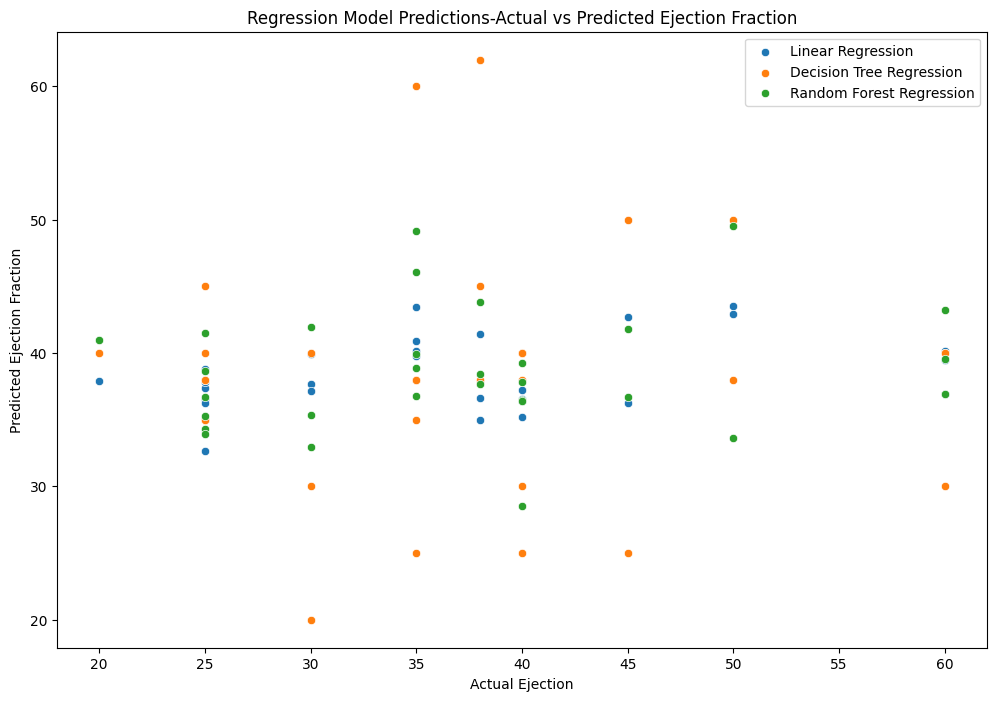

In [13]:
plt.figure(figsize=(12,8))
for model_name, y_pred in predictions.items():
    sns.scatterplot(x=y_test, y=y_pred, label=model_name)

plt.title('Regression Model Predictions-Actual vs Predicted Ejection Fraction')
plt.xlabel('Actual Ejection')
plt.ylabel('Predicted Ejection Fraction')
plt.legend()
plt.show

Feature Importance

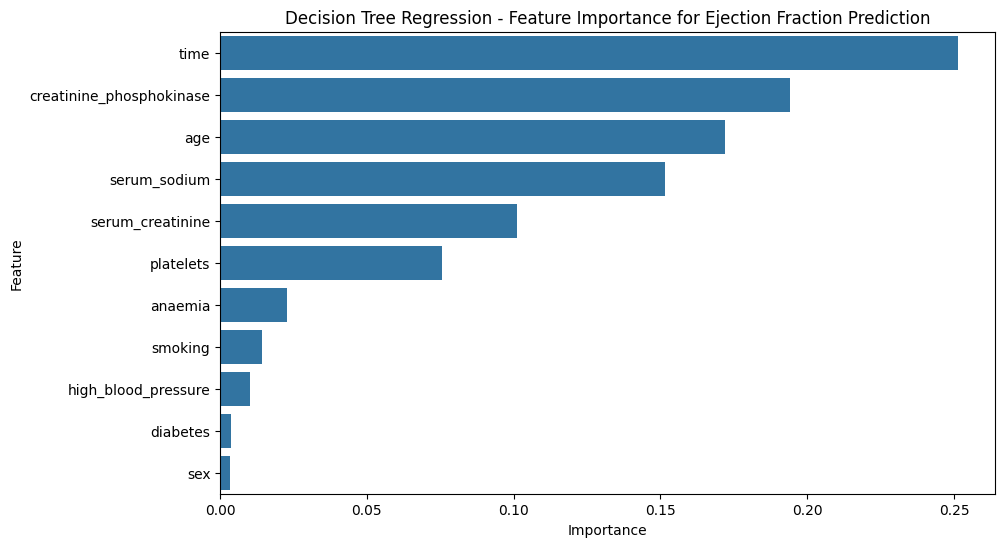

In [14]:
for model_name, model in models.items():
    if 'Tree' in model_name:
        feature_importance = model.feature_importances_
        feature_names = X.columns
        importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
        importance_df = importance_df.sort_values(by='Importance', ascending=False)

        plt.figure(figsize=(10, 6))
        sns.barplot(x='Importance', y='Feature', data=importance_df)
        plt.title(f'{model_name} - Feature Importance for Ejection Fraction Prediction')
        plt.show()

In [15]:
linear_model = LinearRegression()
linear_model.fit(X_train,y_train)

LinearRegression()

In [16]:
coefficients = linear_model.coef_

feature_names = X.columns
coefficients_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
coefficients_df = coefficients_df.sort_values(by='Coefficient', ascending=False)

print("Coefficients for Linear Regression:")
coefficients_df

Coefficients for Linear Regression:


,Feature,Coefficient
1,anaemia,0.628638
7,serum_sodium,0.455505
6,serum_creatinine,0.402843
0,age,0.043120
10,time,0.008482
5,platelets,0.000009
2,creatinine_phosphokinase,-0.000232
4,high_blood_pressure,-0.137528
3,diabetes,-0.166132
9,smoking,-0.607768


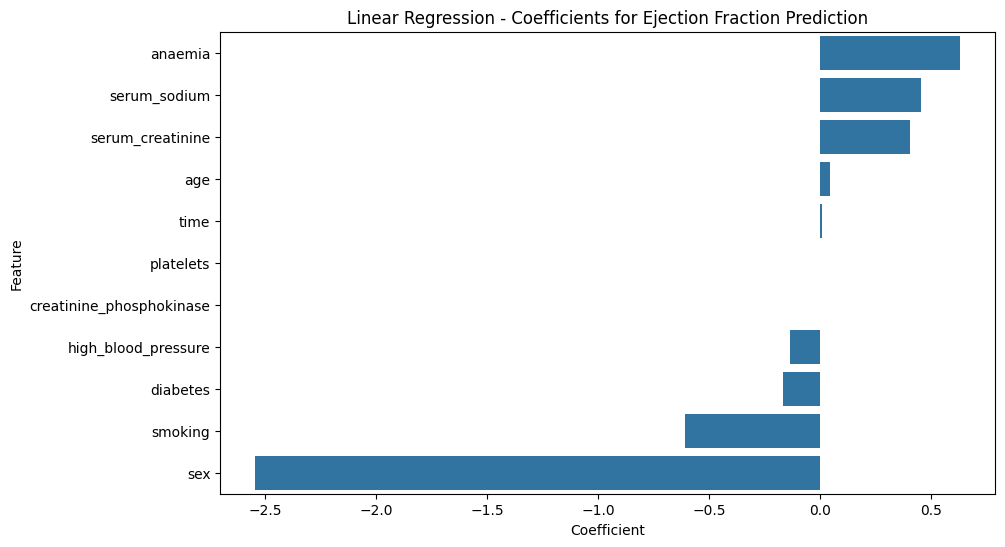

In [17]:
plt.figure(figsize=(10,6))
sns.barplot(x='Coefficient', y='Feature', data = coefficients_df)
plt.title('Linear Regression - Coefficients for Ejection Fraction Prediction')
plt.show()

In [24]:
from sklearn.preprocessing import StandardScaler

In [25]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [27]:
linear_model_scaled = LinearRegression()
linear_model_scaled.fit(X_train_scaled, y_train)

coefficients_scaled = linear_model_scaled.coef_

coefficients_df_scaled = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients_scaled})
coefficients_df_scaled = coefficients_df_scaled.sort_values(by='Coefficient', ascending=False)

print("Coefficients for Linear Regression:")
coefficients_df_scaled

Coefficients for Linear Regression:


,Feature,Coefficient
7,serum_sodium,2.012538
5,platelets,0.868689
10,time,0.660073
0,age,0.509143
6,serum_creatinine,0.385239
1,anaemia,0.310998
4,high_blood_pressure,-0.065572
3,diabetes,-0.082188
2,creatinine_phosphokinase,-0.208505
9,smoking,-0.284303


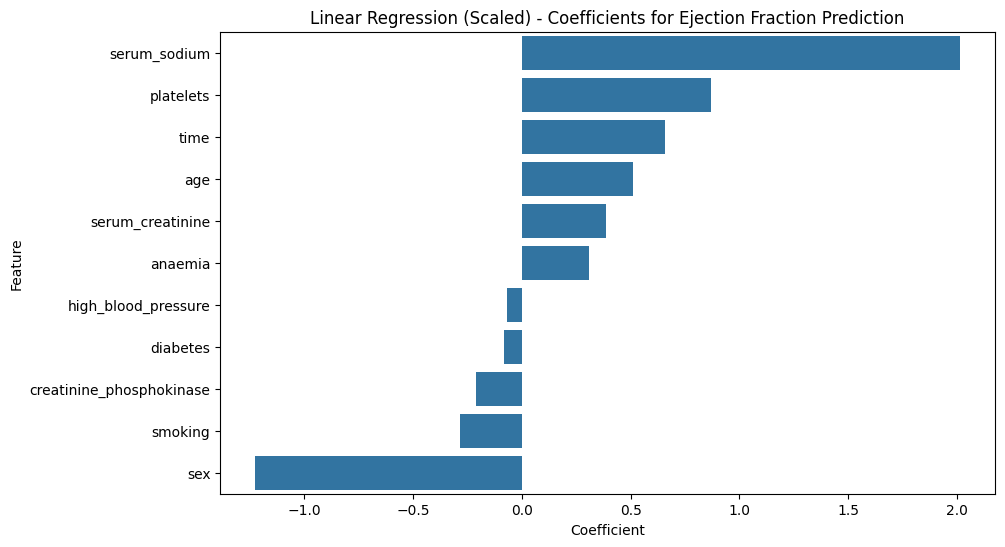

In [29]:
plt.figure(figsize=(10,6))
sns.barplot(x='Coefficient', y='Feature', data = coefficients_df_scaled)
plt.title('Linear Regression (Scaled) - Coefficients for Ejection Fraction Prediction')
plt.show()

Clustering Task: Localization data for person activity

In [30]:
!wget https://archive.ics.uci.edu/static/public/196/localization+data+for+person+activity.zip

--2024-08-09 07:19:53--  https://archive.ics.uci.edu/static/public/196/localization+data+for+person+activity.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘localization+data+for+person+activity.zip’

localization+data+f     [   <=>              ]   6.00M  9.61MB/s    in 0.6s    

2024-08-09 07:19:54 (9.61 MB/s) - ‘localization+data+for+person+activity.zip’ saved [6290730]



In [31]:
!unzip /content/localization+data+for+person+activity.zip

Archive:  /content/localization+data+for+person+activity.zip
  inflating: ConfLongDemo_JSI.txt    
  inflating: dataSetDescription.names  


In [32]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt

In [33]:
df = pd.read_csv("/content/ConfLongDemo_JSI.txt",header=None)

In [34]:
column_names = [
    'Sequence Name', 'Tag Identifier', 'Timestamp', 'Date', 'X Coordinate',
    'Y Coordinate', 'Z Coordinate', 'Activity'
]

In [35]:
df.columns = column_names

In [36]:
df.head()

,Sequence Name,Tag Identifier,Timestamp,Date,X Coordinate,Y Coordinate,Z Coordinate,Activity
0,A01,010-000-024-033,633790226051280329,27.05.2009 14:03:25:127,4.062931,1.892434,0.507425,walking
1,A01,020-000-033-111,633790226051820913,27.05.2009 14:03:25:183,4.291954,1.781140,1.344495,walking
2,A01,020-000-032-221,633790226052091205,27.05.2009 14:03:25:210,4.359101,1.826456,0.968821,walking
3,A01,010-000-024-033,633790226052361498,27.05.2009 14:03:25:237,4.087835,1.879999,0.466983,walking
4,A01,010-000-030-096,633790226052631792,27.05.2009 14:03:25:263,4.324462,2.072460,0.488065,walking


In [37]:
X_clustering = df[['X Coordinate', 'Y Coordinate', 'Z Coordinate']]

In [41]:
scaler_clustering = StandardScaler()
X_clustering_scaled = scaler_clustering.fit_transform(X_clustering)

In [54]:
kmeans = KMeans(n_clusters=10,random_state=42)

In [55]:
df['Cluster_KMeans'] = kmeans.fit_predict(X_clustering_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [52]:
df.head()

,Sequence Name,Tag Identifier,Timestamp,Date,X Coordinate,Y Coordinate,Z Coordinate,Activity,Cluster_KMeans
0,A01,010-000-024-033,633790226051280329,27.05.2009 14:03:25:127,4.062931,1.892434,0.507425,walking,1
1,A01,020-000-033-111,633790226051820913,27.05.2009 14:03:25:183,4.291954,1.781140,1.344495,walking,0
2,A01,020-000-032-221,633790226052091205,27.05.2009 14:03:25:210,4.359101,1.826456,0.968821,walking,0
3,A01,010-000-024-033,633790226052361498,27.05.2009 14:03:25:237,4.087835,1.879999,0.466983,walking,1
4,A01,010-000-030-096,633790226052631792,27.05.2009 14:03:25:263,4.324462,2.072460,0.488065,walking,4


Text(0.5, 1.0, 'K-means clustering for the persona activity dataset')

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


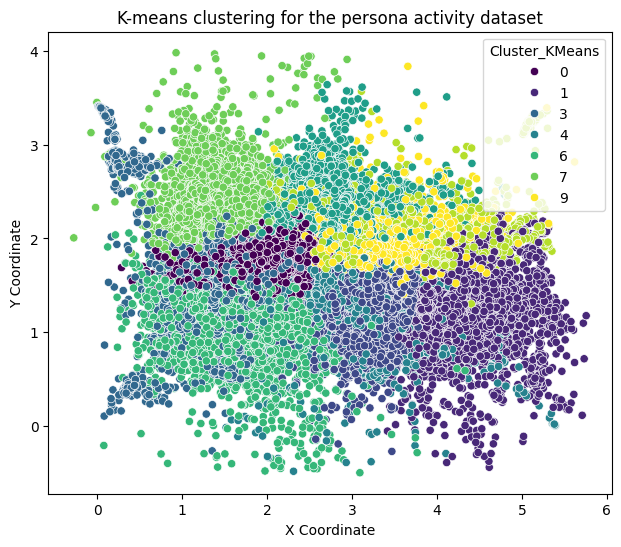

In [56]:
plt.figure(figsize=(16,6))

plt.subplot(1,2,1)
sns.scatterplot(x='X Coordinate', y="Y Coordinate", hue='Cluster_KMeans', palette='viridis', data=df)
plt.title("K-means clustering for the persona activity dataset")

Dimensionality Reduction

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164860 entries, 0 to 164859
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Sequence Name   164860 non-null  object 
 1   Tag Identifier  164860 non-null  object 
 2   Timestamp       164860 non-null  int64  
 3   Date            164860 non-null  object 
 4   X Coordinate    164860 non-null  float64
 5   Y Coordinate    164860 non-null  float64
 6   Z Coordinate    164860 non-null  float64
 7   Activity        164860 non-null  object 
 8   Cluster_KMeans  164860 non-null  int32  
dtypes: float64(3), int32(1), int64(1), object(4)
memory usage: 10.7+ MB


In [58]:
from sklearn.decomposition import PCA

In [59]:
X_dim_reduction = df[['X Coordinate', 'Y Coordinate', 'Z Coordinate']]

In [60]:
scaler_dim_reduction = StandardScaler()
X_scaled_dim_reduction = scaler_dim_reduction.fit_transform(X_dim_reduction)

In [61]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled_dim_reduction)
X_pca

array([[-0.67367916, -0.38225692],
       [-1.01389436, -2.57653683],
       [-0.99926004, -1.6065105 ],
       ...,
       [ 0.03824248, -2.52137166],
       [ 0.08708531,  0.87960434],
       [ 0.05445365,  0.06133142]])

In [62]:
df['PCA_Component_1'] = X_pca[:, 0]
df['PCA_Component_2'] = X_pca[:, 1]

In [63]:
df.head()

,Sequence Name,Tag Identifier,Timestamp,Date,X Coordinate,Y Coordinate,Z Coordinate,Activity,Cluster_KMeans,PCA_Component_1,PCA_Component_2
0,A01,010-000-024-033,633790226051280329,27.05.2009 14:03:25:127,4.062931,1.892434,0.507425,walking,1,-0.673679,-0.382257
1,A01,020-000-033-111,633790226051820913,27.05.2009 14:03:25:183,4.291954,1.781140,1.344495,walking,8,-1.013894,-2.576537
2,A01,020-000-032-221,633790226052091205,27.05.2009 14:03:25:210,4.359101,1.826456,0.968821,walking,8,-0.999260,-1.606511
3,A01,010-000-024-033,633790226052361498,27.05.2009 14:03:25:237,4.087835,1.879999,0.466983,walking,1,-0.711587,-0.276446
4,A01,010-000-030-096,633790226052631792,27.05.2009 14:03:25:263,4.324462,2.072460,0.488065,walking,1,-0.606855,-0.386739


<function matplotlib.pyplot.show(close=None, block=None)>

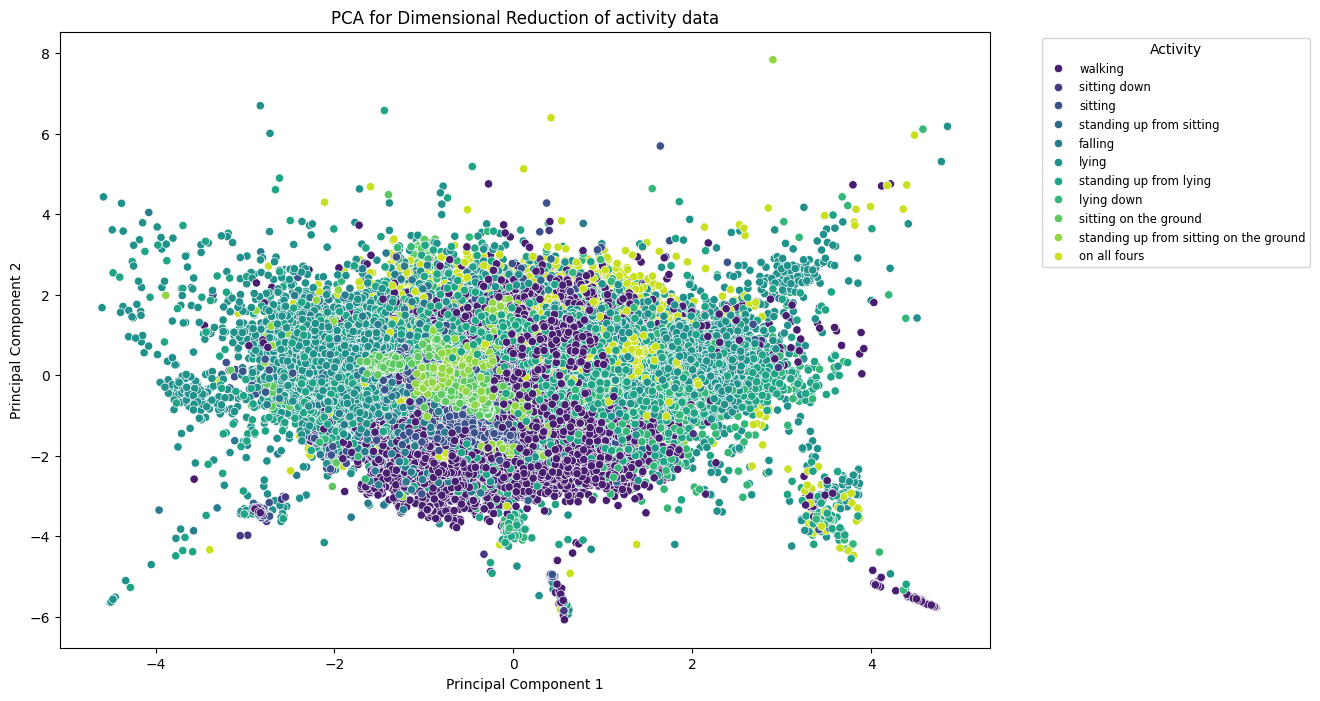

In [67]:
plt.figure(figsize=(12,8))

sns.scatterplot(x='PCA_Component_1', y='PCA_Component_2', hue='Activity',palette='viridis', data=df)
plt.title('PCA for Dimensional Reduction of activity data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Activity',fontsize='small', bbox_to_anchor=(1.05,1), loc='upper left')
plt.show